In [1]:
import pandas as pd
import numpy as np
import Higgs
from Higgs import predictions as HP
from Higgs import bounds as HB
from Higgs.tools.ImplementationUtils import implementPairProductionLimit, readHEPDataCsv
import os, sys
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution



# ATLAS 13 TeV  `qq -> H++ H--, H++ e+ e+` [1710.09748](https://arxiv.org/abs/1710.09748)

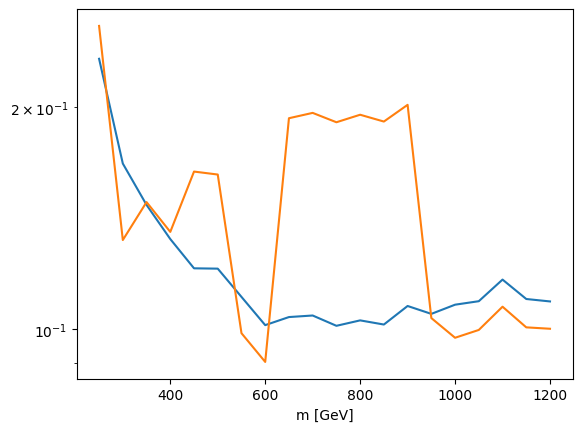

Looks good. Saving this to nonres_LHC13_ATLAS_36.json


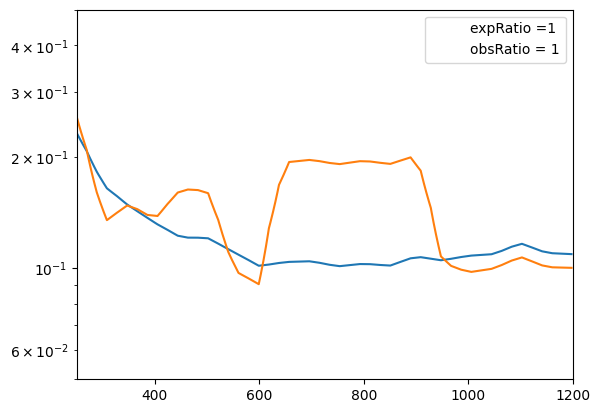

In [5]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1632760/Table%201/1/csv"
)
df = dfs[0].rename(
    columns={
        "Mass [GeV]": "m",
        "Cross section upper limit at 95% CL [fb]": "obs",
    }
)
dfExp = dfs[1].rename(
    columns={
        "Mass [GeV]": "m",
        "Cross section upper limit at 95% CL [fb]": "exp",
        "1 sigma +": "unc+",
        "1 sigma -": "unc-",
    }
)
assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp

process = {"firstDecay": ["eesamesign"], "secondDecay": ["eesamesign"]}
limitFile = implementPairProductionLimit(
    1632760,
    process,
    "Fig. 10(a)",
    df,
    idSuffix=1
)

lim = HB.Limit(limitFile)
pred = Higgs.Predictions()
hp = pred.addParticle(HP.BsmParticle("h++", charge="doubly", cp="undefined"))
hp.setDecayWidth("eesamesign", 1.0)


def testAgainstLimit(mass, rate):
    hp.setMass(mass)
    hp.setCxn("LHC13", "pair", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


hm = np.linspace(250, 1200)
r = np.linspace(0.05, 0.5)
test = np.frompyfunc(testAgainstLimit, 2, 2)
expR, obsR = test(*np.meshgrid(hm, r))
expR = np.array(expR, dtype=float)
obsR = np.array(obsR, dtype=float)
plt.figure()
plt.yscale("log")
plt.contour(hm, r, expR, levels=[1], colors=["C0"]).collections[0].set_label(
    "expRatio =1 "
)
plt.contour(hm, r, obsR, levels=[1], colors=["C1"]).collections[0].set_label(
    "obsRatio = 1"
)
plt.legend()
plt.show()

# ATLAS 8 TeV `qq -> H++ H-- -> e+e+e-e-` [1412.0237](https://arxiv.org/abs/1412.0237)

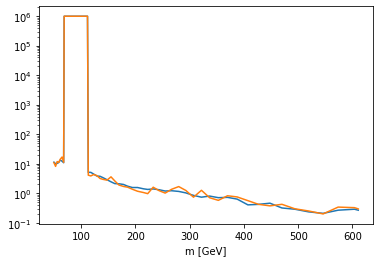

Looks good. Saving this to nonres_LHC8_ATLAS_20.json


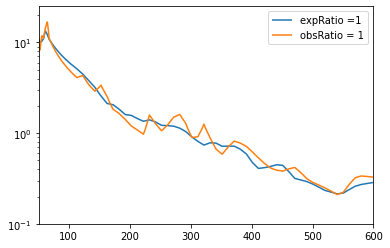

In [34]:
df=pd.read_csv("ATLAS8_doublecharged_ee.csv")

process = {"firstDecay": ["eesamesign"], "secondDecay": ["eesamesign"]}
limitFile = implementPairProductionLimit(
    1331782,
    process,
    "Fig. 4(a)",
    df,
)

lim = HB.Limit(limitFile)
pred = Higgs.Predictions()
hp = pred.addParticle(HP.BsmParticle("h++", charge="doubly"))
hp.setDecayWidth("eesamesign", 1.0)


def testAgainstLimit(mass, rate):
    hp.setMass(mass)
    hp.setCxn("LHC8", "pair", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


hm1 = np.linspace(51, 68)
hm2 = np.linspace(113.5, 600)
hm = np.append(hm1,  hm2)
r = np.linspace(0.1, 25)
test = np.frompyfunc(testAgainstLimit, 2, 2)
expR, obsR = test(*np.meshgrid(hm, r))
plt.figure()
plt.yscale("log")
plt.contour(hm, r, expR, levels=[1], colors=["C0"]).collections[0].set_label(
    "expRatio =1 "
)
plt.contour(hm, r, obsR, levels=[1], colors=["C1"]).collections[0].set_label(
    "obsRatio = 1"
)
plt.legend()
plt.show()


# limit at 70 GeV - 110 GeV not applied